In [2]:
#basic imports
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Lets read some data
ipl_data = pd.read_csv('IPL IMB381IPL2013.csv')
ipl_data.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [4]:
ipl_data.shape
#It has 130 rows

(130, 26)

In [5]:
ipl_data.info()
#Each column has 130 entries. This tells us that there are no missing values in any of the 130 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [6]:
# .value_counts() can be used to find out total no. of unique values in categorical variable columns
ipl_data.COUNTRY.value_counts()

IND    53
AUS    22
SA     16
SL     12
PAK     9
NZ      7
WI      6
ENG     3
BAN     1
ZIM     1
Name: COUNTRY, dtype: int64

In [7]:
# Percentages
ipl_data.COUNTRY.value_counts(normalize=True)*100

IND    40.769231
AUS    16.923077
SA     12.307692
SL      9.230769
PAK     6.923077
NZ      5.384615
WI      4.615385
ENG     2.307692
BAN     0.769231
ZIM     0.769231
Name: COUNTRY, dtype: float64

In [8]:
type(ipl_data.COUNTRY.value_counts())

pandas.core.series.Series

In [9]:
# crosstab
pd.crosstab(ipl_data['AGE'], ipl_data['PLAYING ROLE'])

PLAYING ROLE,Allrounder,Batsman,Bowler,W. Keeper
AGE,,,,
1,4,5,7,0
2,25,21,29,11
3,6,13,8,1


In [10]:
# Sorting!
ipl_data[['PLAYER NAME', 'SOLD PRICE']].sort_values('SOLD PRICE').head()

,PLAYER NAME,SOLD PRICE
73,"Noffke, AA",20000
46,Kamran Khan,24000
0,"Abdulla, YA",50000
1,Abdur Razzak,50000
118,Van der Merwe,50000


In [11]:
ipl_data[['PLAYER NAME', 'SOLD PRICE']].sort_values('SOLD PRICE', ascending=False).head()

,PLAYER NAME,SOLD PRICE
93,"Sehwag, V",1800000
127,Yuvraj Singh,1800000
50,"Kohli, V",1800000
111,"Tendulkar, SR",1800000
113,"Tiwary, SS",1600000


In [12]:
# Adding new columns
ipl_data['PREMIUM'] = ipl_data['SOLD PRICE'] - ipl_data['BASE PRICE']

In [13]:
ipl_data[['PLAYER NAME', 'SOLD PRICE', 'BASE PRICE', 'PREMIUM']].sort_values('PREMIUM', ascending=False).head()

,PLAYER NAME,SOLD PRICE,BASE PRICE,PREMIUM
50,"Kohli, V",1800000,150000,1650000
113,"Tiwary, SS",1600000,100000,1500000
127,Yuvraj Singh,1800000,400000,1400000
111,"Tendulkar, SR",1800000,400000,1400000
93,"Sehwag, V",1800000,400000,1400000


In [14]:
# Grouping
sold_price_age = ipl_data.groupby('AGE')['SOLD PRICE'].mean().reset_index()
sold_price_age_role = ipl_data.groupby(['AGE', 'PLAYING ROLE'])['SOLD PRICE'].mean().reset_index()
print(sold_price_age)
print(sold_price_age_role)


   AGE     SOLD PRICE
0    1  720250.000000
1    2  484534.883721
2    3  520178.571429
    AGE PLAYING ROLE    SOLD PRICE
0     1   Allrounder  5.875000e+05
1     1      Batsman  1.110000e+06
2     1       Bowler  5.177143e+05
3     2   Allrounder  4.494000e+05
4     2      Batsman  6.547619e+05
5     2       Bowler  3.979310e+05
6     2    W. Keeper  4.677273e+05
7     3   Allrounder  7.666667e+05
8     3      Batsman  4.576923e+05
9     3       Bowler  4.143750e+05
10    3    W. Keeper  7.000000e+05


In [15]:
ipl_data[['PLAYER NAME', 'SOLD PRICE']].sort_values('SOLD PRICE', ascending=False).head()

,PLAYER NAME,SOLD PRICE
93,"Sehwag, V",1800000
127,Yuvraj Singh,1800000
50,"Kohli, V",1800000
111,"Tendulkar, SR",1800000
113,"Tiwary, SS",1600000


In [16]:
#Lets load a SPACE separated dataset about cars
autos = pd.read_csv('auto-mpg.data', sep='\s+', header=None)
autos.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [17]:
autos.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [18]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [19]:
# horsepower is inferred as object maybe because it contains some non numeric values
# Lets replace them with NaN

autos['horsepower'] = pd.to_numeric(autos.horsepower, errors='coerce')
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [20]:
autos[autos.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [21]:
autos.dropna(subset=['horsepower'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


<AxesSubplot:xlabel='AGE', ylabel='SOLD PRICE'>

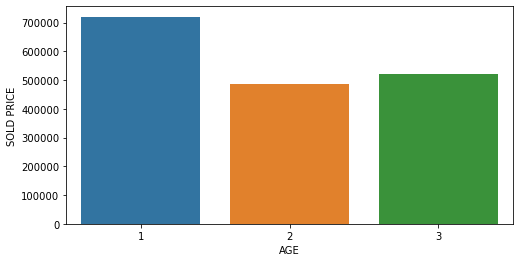

In [22]:
#Lets PLOT

sns.barplot(data=sold_price_age, x='AGE', y='SOLD PRICE')

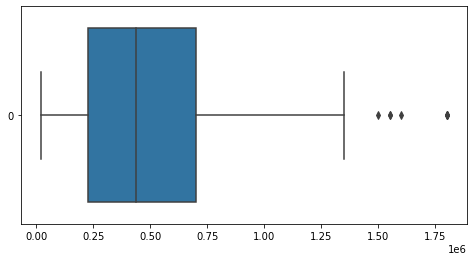

In [23]:
#Lets explore boxplot objects
box = sns.boxplot(data=ipl_data['SOLD PRICE'], orient='h')

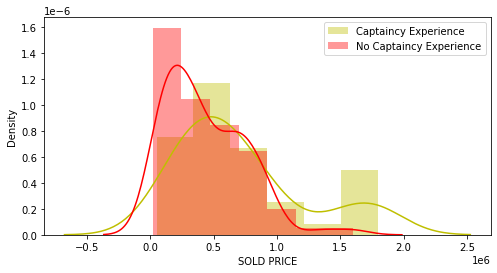

In [24]:
sns.distplot(ipl_data[ipl_data['CAPTAINCY EXP']==1]['SOLD PRICE'], color='y', label='Captaincy Experience')
sns.distplot(ipl_data[ipl_data['CAPTAINCY EXP']==0]['SOLD PRICE'], color='r', label='No Captaincy Experience')
plt.legend()

---

In [25]:
# Exercise -

#13 to 20
heart_data = pd.read_csv('SAheart.data', sep=',')
heart_data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [26]:
#13
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


<AxesSubplot:xlabel='chd', ylabel='famhist'>

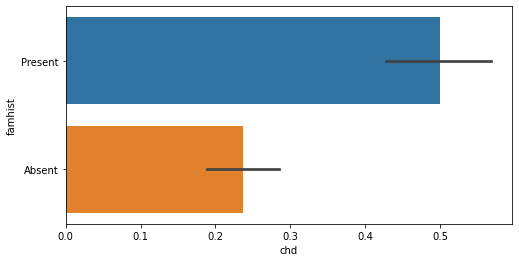

In [27]:
#14
sns.barplot(data=heart_data, x='chd', y='famhist')

<AxesSubplot:xlabel='age', ylabel='sbp'>

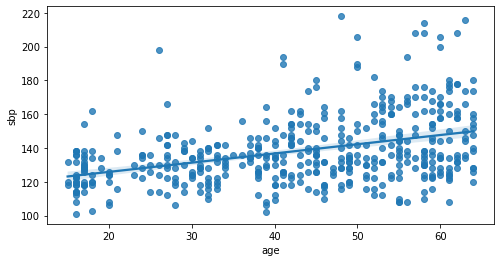

In [28]:
#15
sns.regplot(data=heart_data, x='age', y='sbp')

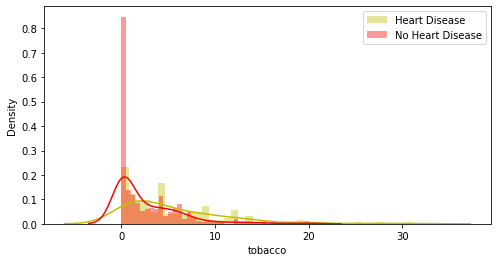

In [29]:
#16
sns.distplot(heart_data[heart_data['chd']==1]['tobacco'], color='y', label='Heart Disease', bins=40)
sns.distplot(heart_data[heart_data['chd']==0]['tobacco'], color='r', label='No Heart Disease', bins=40)
plt.legend()

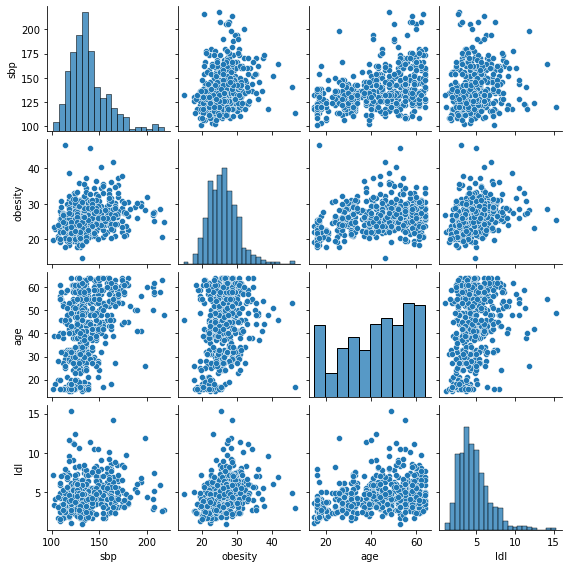

In [30]:
#17
features=['sbp', 'obesity', 'age', 'ldl']
sns.pairplot(heart_data[features], size=2)

17


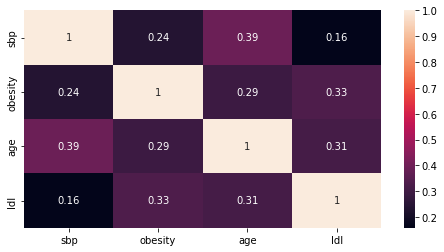

In [31]:
sns.heatmap(data=heart_data[features].corr(), annot=True)
print(heart_data.age[12])

In [32]:
#18
age_list=[]
for i in range(0,len(heart_data.sbp)):
    if heart_data.age[i] < 15:
        age_list.append('young')
    elif heart_data.age[i] < 35:
        age_list.append('adults')
    elif heart_data.age[i] < 55:
        age_list.append('mid')
    else:
        age_list.append('old')
heart_data['agegroup'] = age_list
heart_data.head()
    

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,mid
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,old
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,mid
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,old
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,mid


<AxesSubplot:xlabel='agegroup', ylabel='chd'>

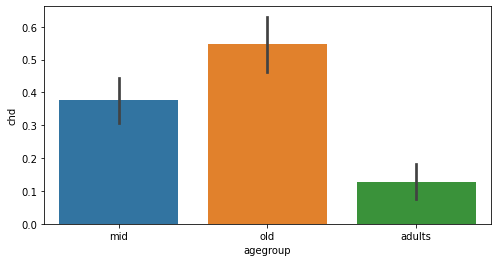

In [33]:
#19
sns.barplot(data=heart_data, x='agegroup', y='chd')

<AxesSubplot:xlabel='agegroup', ylabel='ldl'>

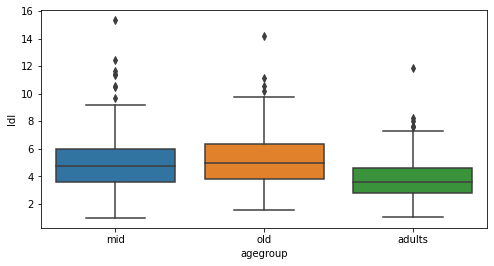

In [34]:
#20
sns.boxplot(data=heart_data, x='agegroup', y='ldl')

---

In [35]:
#Normal Distribution

beml = pd.read_csv('BEML.csv')
beml.head()
glaxo = pd.read_csv('GLAXO.csv')
glaxo.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [36]:
#Lets index first
beml = beml.set_index(pd.DatetimeIndex(beml['Date']))
beml.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-01-04,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
2010-01-05,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2010-01-06,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
2010-01-07,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
2010-01-08,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [37]:
glaxo = glaxo.set_index(pd.DatetimeIndex(glaxo['Date']))
glaxo.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-01-04,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
2010-01-05,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2010-01-06,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
2010-01-07,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
2010-01-08,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [38]:
#Lets calculate Gain by method pct_change
beml['Gain'] = beml.Close.pct_change(periods=1)
beml.dropna(inplace=True)
print(beml.head())

glaxo['Gain'] = glaxo.Close.pct_change(periods=1)
glaxo.dropna(inplace=True)
print(glaxo.head())

                  Date    Open     High      Low    Last    Close  \
Date                                                                
2010-01-05  2010-01-05  1146.8  1149.00  1128.75  1135.0  1134.60   
2010-01-06  2010-01-06  1140.0  1164.25  1130.05  1137.0  1139.60   
2010-01-07  2010-01-07  1142.0  1159.40  1119.20  1141.0  1144.15   
2010-01-08  2010-01-08  1156.0  1172.00  1140.00  1141.2  1144.05   
2010-01-11  2010-01-11  1154.0  1159.45  1134.10  1140.1  1137.00   

            Total Trade Quantity  Turnover (Lacs)      Gain  
Date                                                         
2010-01-05               59504.0           676.47 -0.000881  
2010-01-06              128908.0          1482.84  0.004407  
2010-01-07              117871.0          1352.98  0.003993  
2010-01-08              170063.0          1971.42 -0.000087  
2010-01-11               58910.0           674.55 -0.006162  
                  Date     Open     High      Low    Last    Close  \
Date        

In [39]:
beml_c = beml[['Date', 'Close', 'Gain']]
glaxo_c = glaxo[['Date', 'Close', 'Gain']]

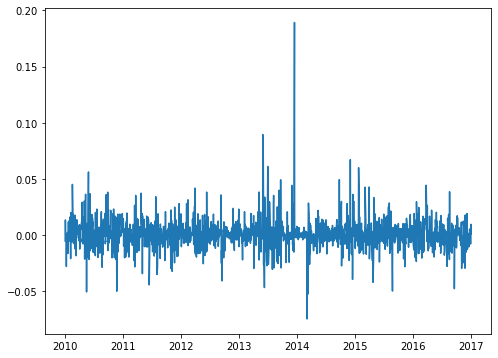

In [40]:
#Lets look at Gain distribution
plt.figure(figsize=(8,6))
plt.plot(glaxo_c.index, glaxo_c.Gain)

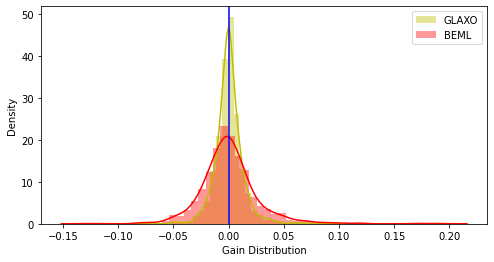

In [41]:
#We can see its mostly concentrated around +- 0.05 with few outliers
# Now lets see distribution plot

sns.distplot(glaxo_c.Gain, color='y', label='GLAXO')
sns.distplot(beml_c.Gain, color='r', label='BEML')
plt.xlabel('Gain Distribution')
plt.axvline(x = 0, color = 'b')
plt.legend()

In [42]:
print("Daily gain of GLAXO\n--------------------------------")
print('Mean: ', round(glaxo_c.Gain.mean(),4))
print('Std. Deviation: ', round(glaxo_c.Gain.std(),4))

print("Daily gain of BEML\n--------------------------------")
print('Mean: ', round(beml_c.Gain.mean(),4))
print('Std. Deviation: ', round(beml_c.Gain.std(),4))

Daily gain of GLAXO
--------------------------------
Mean:  0.0004
Std. Deviation:  0.0134
Daily gain of BEML
--------------------------------
Mean:  0.0003
Std. Deviation:  0.0264


In [43]:
#Lets calculate confidence intervals
from scipy import stats

In [44]:
beml_c_ci = stats.norm.interval(0.95, loc=beml_c.Gain.mean(), scale=beml_c.Gain.std())
print("Gain at 95% Confidence interval for BEML is: ", np.round(beml_c_ci,4))

Gain at 95% Confidence interval for BEML is:  [-0.0515  0.0521]


In [45]:
glaxo_c_ci = stats.norm.interval(0.95, loc=glaxo_c.Gain.mean(), scale=glaxo_c.Gain.std())
print("Gain at 95% Confidence interval for GLAXO is: ", np.round(glaxo_c_ci,4))

Gain at 95% Confidence interval for GLAXO is:  [-0.0258  0.0266]


In [46]:
#Now lets look at CDF
#If I want to know what is the probability of making a loss of more than 2%, we need to use CDF

print("Probability of making a loss of 2% or higher in BEML: ")
print(round(stats.norm.cdf(-0.02, loc=beml_c.Gain.mean(),scale=beml_c.Gain.std()),4))
print("Probability of making a loss of 2% or higher in GLAXO: ")
print(round(stats.norm.cdf(-0.02, loc=glaxo_c.Gain.mean(),scale=glaxo_c.Gain.std()),4))

Probability of making a loss of 2% or higher in BEML: 
0.2216
Probability of making a loss of 2% or higher in GLAXO: 
0.0635


In [48]:
breakups_data = pd.read_csv('breakups.csv')
breakups_data.head()

,Before_Breakup,After_Breakup
0,470,408
1,354,439
2,496,321
3,351,437
4,349,335


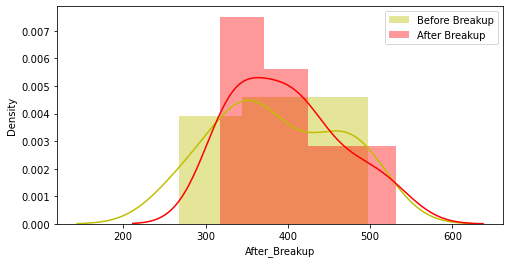

In [52]:
sns.distplot(breakups_data.Before_Breakup, color='y', label='Before Breakup')
sns.distplot(breakups_data.After_Breakup, color='r', label='After Breakup')
plt.legend()

In [53]:
stats.ttest_rel(breakups_data.Before_Breakup, breakups_data.After_Breakup)

Ttest_relResult(statistic=-0.5375404241815105, pvalue=0.5971346738292477)